In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import re
import nltk
nltk.download('wordnet')
np.random.seed(400)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Somil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# Helper Functions
def chat_printer(arr):
    printer_arr = []
    for i in range(len(arr)):
        lenchat = len(arr[i][1])
        no_of_chats = min(5,int(lenchat/10))
        line = arr[i][0] + ':\n' + '\n'.join(arr[i][1][:no_of_chats]) + '.......'
        printer_arr.append(line)
        
    return printer_arr

def contact_processor(csv_names):
    # Go to contacts.google.com and export as Google CSV
    # Import it here
    # Used for preprocessing docs
    if isinstance(csv_names,list):
        final = []
        for csv_name in csv_names: 
            df = pd.read_csv(csv_name)['Name']
            contact_names = list(set(df.values))
            new = []
            for name in contact_names:
                if str(name) != 'nan':
                    new.append(name)
            final += new
            
        final = set(list(final))
        return final
    elif isinstance(csv_names,str):
        df = pd.read_csv(csv_name)['Name']
        contact_names = list(set(df.values))
        new = []
        for name in contact_names:
            if str(name) != 'nan':
                new.append(name)
                
    return new
    
def get_top_chats(doc,num):
    arr =[]
    for i in range(num):
        text = ' '.join(doc[i][1])
        arr.append(text)
        
    return arr

# Perform Stemming after Lemmatizing
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    contacts = contact_processor(['contacts_1.csv','contacts_2.csv'])
    prohibitedWords = contacts
    big_regex = re.compile('|'.join(map(re.escape, prohibitedWords)))
    the_message = big_regex.sub("", text)
    text = the_message
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
            #lemmatize_stemming(token)
            
    return result

## Preprocess Chat Text

In [3]:
filename = "sasti_chat.txt"
outfile = open(filename,'rb')
chat = outfile.read().decode('utf-8')
chat = chat.splitlines()
print('Length of Chat: {}\n'.format(len(chat)))
print('\n'.join(chat[:10]))
outfile.close()

Length of Chat: 18997

05/06/17, 11:53 pm - Messages to this group are now secured with end-to-end encryption. Tap for more info.
15/04/17, 2:20 pm - Anirudh Dj created group "Sasti memes 4 randi teens"
05/06/17, 11:53 pm - Shaurya added you
05/06/17, 11:53 pm - Vishesh Dj: 😂😂😂
05/06/17, 11:54 pm - Vishesh Dj: Her dick will be bigger than Sohan's
05/06/17, 11:54 pm - Anirudh Dj: 😂😂😂😂
05/06/17, 11:54 pm - Sohan Dj: 😂😂😂😂😂😂
05/06/17, 11:54 pm - Jash Sheth: 😂😂😂
05/06/17, 11:55 pm - Anirudh Dj: https://www.instagram.com/p/BUzKwQql0Zn/?hl=en
05/06/17, 11:55 pm - Sohan Dj: Yeah I have seen this


In [4]:
new_chat = []
temp = ''
# If chat starts with Date, make an empty buffer and keep adding until
# you find another line which starts with a date
for i in range(len(chat)):
    if re.match(r'^\d\d\/\d\d\/\d\d',chat[i]) and temp == '':
        temp = chat[i]
    elif re.match(r'^\d\d\/\d\d\/\d\d',chat[i]) and temp != '':
        new_chat.append(temp)
        temp = ''
    else:
        temp += chat[i]
chat = new_chat
print("Length of Chat: {}".format(len(chat)))
print('\n'.join(chat[:10]))

Length of Chat: 8939
05/06/17, 11:53 pm - Messages to this group are now secured with end-to-end encryption. Tap for more info.
05/06/17, 11:53 pm - Shaurya added you
05/06/17, 11:54 pm - Vishesh Dj: Her dick will be bigger than Sohan's
05/06/17, 11:54 pm - Sohan Dj: 😂😂😂😂😂😂
05/06/17, 11:55 pm - Anirudh Dj: https://www.instagram.com/p/BUzKwQql0Zn/?hl=en
05/06/17, 11:55 pm - Sohan Dj: 😂😂😂😂😂😂
05/06/17, 11:56 pm - Shaurya: Part 2 best
05/06/17, 11:57 pm - Vishesh Dj: Chodu CID dekha hai?
05/06/17, 11:57 pm - Jash Sheth: 25 Randi Wala
05/06/17, 11:57 pm - Jash Sheth: It was damn cheap but funny af😂😂


In [5]:
dates = {}
# Create a dictionary of structure "Date:[Array of Chats]"
for i in range(len(chat)):
    if re.match(r'^\d\d\/\d\d\/\d\d$',chat[i][:8]):
        if chat[i][:8] not in dates.keys():
            dates[chat[i][:8]] = [chat[i].split('-',1)[1]]
        else:
            dates[chat[i][:8]].append(chat[i].split('-',1)[1])
    
#Sort Dictionary according to length of chats and get the top 50 chat Days
sorted_count = sorted(dates.items(),key=lambda kv:len(kv[1]),reverse= True)[:50]

# Get Days with the highest no of chats
print('\n\n'.join(chat_printer(sorted_count)[1:5]))

20/05/18:
 Shaurya: Today is a big day
 Shaurya: WHO ALL ARE EXCITED? RAISE YOUR HAND 🤩🤩🤩🤩🤩🙌🏻🙌🏻🙌🏻🙌🏻🙌🏻
 Rahil Sarvaiya: 🙌🏻🙌🏻
 Anirudh Dj: 🙌🏿🙌🏿🙌🏿🙌🏿🙌🏿🙌🏿🙌🏿🙌🏿
 Somil Shah: 🙌🙌🙌.......

07/09/18:
 Karthik Dj changed the group description
 Rahil Sarvaiya: 😂
 Pratik Tiwari: 😂😂
 Shaurya changed the group description
 Vaibhav Mewada changed the group description.......

11/05/18:
 Swapnil Sabnis added Rohan Dj
 Milind Dj: Game is on Sunday right?
 Vaibhav Mewada: Abhi se hype karna chalu kar do
 Vaibhav Mewada: MI hi jitega
 Milind Dj: A bit too exaggerated na.......

20/05/19:
 Pratik Tiwari: They are just universe's, it's not that bad, he didn't say "in the whole galaxy" thank god for that
 Vaibhav Mewada: He must have dissed MI on Koffee with Karan
 Vaibhav Mewada: [20/05, 9:33 PM] Swapnil: He said that Virat Kohli is world's worst behaved cricketer[20/05, 9:34 PM] Swapnil: Because of Karan Johar who was responsible behind the ban of KL Rahul and Hardik Pandya[20/05, 9:35 PM] Swapnil: Universe

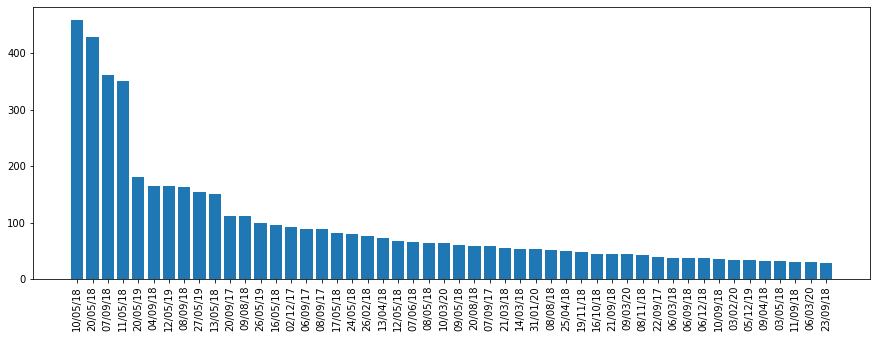

<Figure size 432x288 with 0 Axes>

In [6]:
dates = []
lenchats = []
fig = plt.figure(figsize=(15,5))

for i in range(len(sorted_count)):
    dates.append(sorted_count[i][0])
    lenchats.append(len(sorted_count[i][1]))
    
y_pos = range(len(dates))
plt.bar(y_pos,lenchats)
plt.xticks(y_pos,dates,rotation=90)

plt.show()
plt.savefig('sasti.png')

In [12]:
doc = get_top_chats(sorted_count,20)
processed = [preprocess(text) for text in doc]
dictionary = gensim.corpora.Dictionary(processed)

In [13]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed]

In [14]:
document_num = 0
bow_doc_x = bow_corpus[document_num]
for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 0 ("aanta") appears 1 time.
Word 1 ("aarak") appears 1 time.
Word 2 ("aata") appears 1 time.
Word 3 ("aayega") appears 1 time.
Word 4 ("abhi") appears 2 time.
Word 5 ("acche") appears 1 time.
Word 6 ("actually") appears 2 time.
Word 7 ("added") appears 1 time.
Word 8 ("afterlife") appears 1 time.
Word 9 ("agar") appears 1 time.
Word 10 ("agreed") appears 1 time.
Word 11 ("ahaha") appears 1 time.
Word 12 ("ahahahahahaa") appears 1 time.
Word 13 ("ahead") appears 1 time.
Word 14 ("ahima") appears 2 time.
Word 15 ("aine") appears 1 time.
Word 16 ("aisa") appears 1 time.
Word 17 ("alert") appears 1 time.
Word 18 ("alinga") appears 1 time.
Word 19 ("amazing") appears 1 time.
Word 20 ("ambani") appears 1 time.
Word 21 ("anjali") appears 1 time.
Word 22 ("arathi") appears 1 time.
Word 23 ("ardik") appears 6 time.
Word 24 ("aren") appears 1 time.
Word 25 ("arma") appears 1 time.
Word 26 ("arry") appears 1 time.
Word 27 ("arwadis") appears 1 time.
Word 28 ("asked") appears 2 time.
Word 29 

In [15]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 5, 
                                   id2word = dictionary,                                    
                                   passes = 50,
                                   workers = 2)

In [16]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.018*"swapnil" + 0.011*"sarvaiya" + 0.010*"match" + 0.009*"nahi" + 0.008*"omitted" + 0.007*"yaar" + 0.004*"pandya" + 0.004*"chance" + 0.004*"neighbours" + 0.003*"baar"


Topic: 1 
Words: 0.028*"shah" + 0.026*"omitted" + 0.020*"sarvaiya" + 0.012*"nirudh" + 0.010*"sheth" + 0.006*"group" + 0.006*"icon" + 0.006*"body" + 0.005*"changed" + 0.005*"send"


Topic: 2 
Words: 0.029*"shah" + 0.018*"swapnil" + 0.012*"ketaki" + 0.012*"omitted" + 0.011*"dude" + 0.008*"nirudh" + 0.007*"raha" + 0.005*"deleted" + 0.005*"submit" + 0.005*"nahi"


Topic: 3 
Words: 0.027*"sarvaiya" + 0.022*"swapnil" + 0.020*"shah" + 0.009*"ketaki" + 0.008*"group" + 0.008*"omitted" + 0.007*"think" + 0.007*"vaibhav" + 0.007*"like" + 0.007*"nahi"


Topic: 4 
Words: 0.023*"ough" + 0.018*"swapnil" + 0.016*"omitted" + 0.014*"easy" + 0.013*"nahi" + 0.009*"shah" + 0.006*"nirudh" + 0.005*"hoga" + 0.005*"mbani" + 0.005*"support"


